In [1]:
from astropy.io import fits
from astropy import units as u
import asdf
from jwst import datamodels

In [2]:
import timeit
import numpy as np

Test 

- open file
- read data array
- close file

The above operations are run 100 times. The plots show the mean of the 100 runs.

FITS file (`nrs.fits`):

A JWST file with `SCI`, `ERR` and `DQ` extensions.

Datamodels file (`nrs.fits`):

The file was read in as an ImageModel.

ASDF file (`nrs.asdf`):

The ImageModel was written out to asdf.

In [5]:
t = timeit.Timer("f=fits.open('nrs.fits'); f[1].data; f.close()", setup="from astropy.io import fits")
tfits = t.repeat(100, 1)

In [6]:
t = timeit.Timer("fa=asdf.open('nrs.asdf'); fa.tree['data']; fa.close()", setup="import asdf")
tasdf = t.repeat(100, 1)

In [7]:
t = timeit.Timer("im=datamodels.open('nrs.fits'); im.data; im.close()", setup="from jwst import datamodels")
tdatamodels = t.repeat(100, 1)

In [8]:
fits_mean = np.array(tfits).mean()
asdf_mean = np.array(tasdf).mean()
datamodels_mean = np.array(tdatamodels).mean()

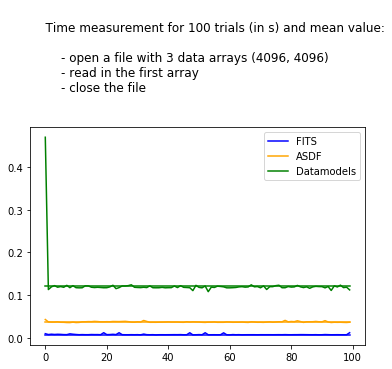

In [10]:
from matplotlib import pyplot as plt

plt.plot(tfits, color='b')
plt.plot([fits_mean]*100, color='b', label='FITS')
plt.plot(tasdf, color='orange')
plt.plot([asdf_mean]*100, color='orange', label="ASDF")
plt.plot(tdatamodels, color='green')
plt.plot([datamodels_mean]*100, color='green', label="Datamodels")
plt.legend()
title = """
    Time measurement for 100 trials (in s) and mean value:
    
        - open a file with 3 data arrays (4096, 4096)
        - read in the first array
        - close the file
        
    """
title= plt.title(title, loc='left')
plt.ylabel = "Time, ms"
plt.xlabel = "Trial"

<BarContainer object of 3 artists>

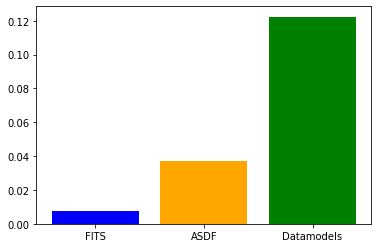

In [11]:
plt.bar([1, 2, 3], [fits_mean, asdf_mean, datamodels_mean], 
        color=['blue', 'orange', 'green'], 
        tick_label=['FITS', 'ASDF', 'Datamodels'])